# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

`1. Applicants having a credit history `\
`2. Applicants with higher applicant and co-applicant incomes`\
`3. Applicants with higher education level`\
`4. Properties in urban areas with high growth perspectives`\
`5. The ammount of financing being sought for is comensurate with thier income`\
`6. How you will use the loan, (buiness or personal income)`\
`7. Debt to income ratio is less than 0.44`\
`8. At least two years of previous working income before seeking a loan`


Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

In [2341]:
import os 
import os.path


## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [2495]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Deployment/data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2343]:
# Check columns with missing values and the number of missing values in those columns
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col, df[col].isnull().sum())

Gender 13
Married 3
Dependents 15
Self_Employed 32
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50


Look at some basic statistics for numerical variables.

In [2344]:
# Look at basic statistics for numerical variables
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [2345]:
# count of credit history where credit history is 1
df[df['Credit_History']==1].count()

Loan_ID              475
Gender               466
Married              472
Dependents           465
Education            475
Self_Employed        450
ApplicantIncome      475
CoapplicantIncome    475
LoanAmount           458
Loan_Amount_Term     467
Credit_History       475
Property_Area        475
Loan_Status          475
dtype: int64

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



<AxesSubplot: >

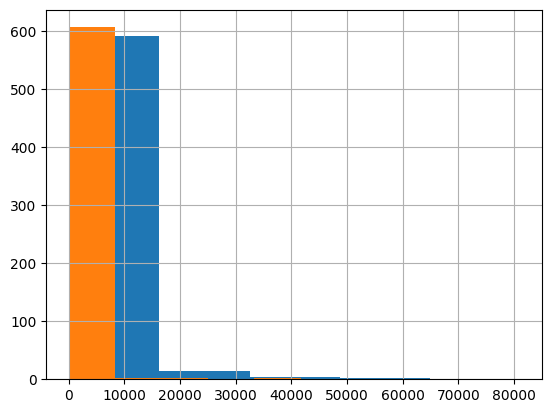

In [2496]:
# plot histogram of ApplicantIncome and CoapplicantIncome
df['ApplicantIncome'].hist(bins=5)
df['CoapplicantIncome'].hist(bins=5)


Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [2347]:
# Look at number of unique values in each of the nominal variables
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].nunique())
        

Loan_ID 614
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
Property_Area 3
Loan_Status 2


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [2348]:
# bar plots for all categorical variables
# for col in df.columns:
#     if df[col].dtype == 'object':
#         df[col].value_counts().plot(kind='bar')
#         plt.title(col)
#         plt.show()

In [2349]:
# import lets plot library
from lets_plot import *
LetsPlot.setup_html()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [2516]:
# histogram of ApplicantIncome, bins=50 using lets plot
mean = df['ApplicantIncome'].mean()
p = ggplot(df, aes(x='ApplicantIncome')) + geom_dotplot(binwidth=570, color = 'white', fill = 'white', method='histodot', stat='identity')
p + ggtitle(" ")  + xlab("ApplicantIncome") + ylab("Count") + theme_classic() + flavor_high_contrast_dark()

WARN: using 'stat' parameter for dotplot was deprecated.



Look at box plots to understand the distributions. 

In [2517]:
mean

5403.459283387622

Text(0.5, 1.0, 'ApplicantIncome')

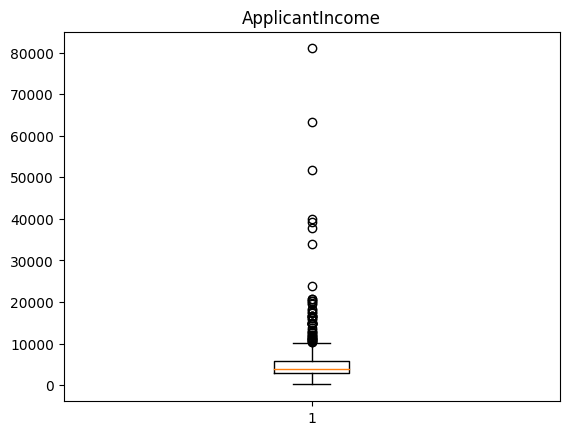

In [2351]:
# box plot of ApplicantIncome, bins=50 using lets plot using pyplot

plt.boxplot(df['ApplicantIncome'])
plt.title("ApplicantIncome")

Look at the distribution of income segregated  by `Education`

In [2352]:
# box plot of income segregated  by `Education` using lets plot
p = ggplot(df, aes(x='Education', y='ApplicantIncome')) + geom_boxplot(bins = 75, outlier_shape = 50, outlier_size = 7, outlier_color = 'red')
p + ggtitle("ApplicantIncome")  + xlab("Education") + ylab("ApplicantIncome") + theme_classic() + flavor_high_contrast_dark()

Look at the histogram and boxplot of LoanAmount

In [2521]:
# histogram of LoanAmount, bins=50 using lets plot
mean = df['LoanAmount'].mean()
p = ggplot(df, aes(x='LoanAmount')) + geom_histogram(bins=75, color = 'yellow', fill = 'black', alpha = 0.5)
p + ggtitle(" ")  + xlab("LoanAmount") + ylab("Count") + theme_classic() + flavor_high_contrast_dark()

In [2522]:
mean

146.41216216216216

In [2354]:
# box plot of Loan Amount using pyplot 
# create bins for loan amount
bins = [0, 100, 200, 700]
loan_ammount = pd.cut(df['LoanAmount'], bins)
loan_ammount = loan_ammount.value_counts(sort=False)

In [2519]:
# box plot of LoanAmount, bins=50 using lets plot
p = ggplot(df, aes(x='LoanAmount')) + geom_boxplot(bins = 0.2, outlier_shape = 50, outlier_size = 7, outlier_color = 'red')
p + ggtitle("LoanAmount")  + xlab("LoanAmount") + ylab("Count") + theme_classic() + flavor_high_contrast_dark()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

#### Possible hypotheses
Which applicants are more likely to get a loan

`1. Applicants having a credit history `\
`2. Applicants with higher applicant and co-applicant incomes`\
`3. Applicants with higher education level`\
`4. Properties in urban areas with high growth perspectives`\
`5. The ammount of financing being sought for is comensurate with thier income`\
`6. How you will use the loan, (buiness or personal income)`\
`7. Debt to income ratio is less than 0.44`\
`8. At least two years of previous working income before seeking a loan`

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [2523]:
# pivot table showing probability of getting a loan based on credit history
df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

# plot bar chart of probability of getting a loan based on credit history using lets plot
p = ggplot(df, aes(x='Credit_History', fill='Loan_Status')) + geom_bar(position='dodge')
p + ggtitle(" ")  + xlab("Credit_History") + ylab("Probability") + theme_classic() + flavor_high_contrast_dark()

<AxesSubplot: xlabel='Credit_History,Education'>

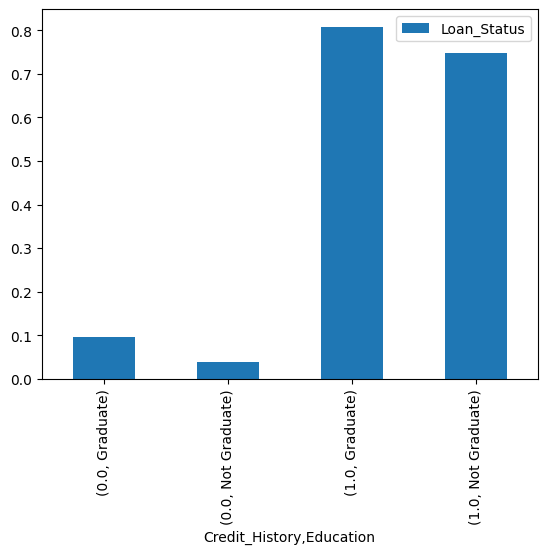

In [2357]:
# pivot table showing probability of getting a loan based on education level and credit history. 
df.pivot_table(values='Loan_Status', index=['Credit_History', 'Education'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

# plot bar chart of probability of getting a loan based on education level and credit history using pyplot
df.pivot_table(values='Loan_Status', index=['Credit_History', 'Education'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean()).plot(kind='bar')


In [2358]:
cel = df.pivot_table(values='Loan_Status', index=['Credit_History', 'Education'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean()).reset_index()

# Bin Credit History and Education to new columns for plotting
cel['Credit_History'] = cel['Credit_History'].astype('category').cat.codes
cel['Education'] = cel['Education'].astype('category')

#create a new column for plotting purposes that combines the two columns into one string
cel['Credit_Education'] = cel['Credit_History'].astype(str) + cel['Education'].astype(str)

cel


,Credit_History,Education,Loan_Status,Credit_Education
0,0,Graduate,0.095238,0Graduate
1,0,Not Graduate,0.038462,0Not Graduate
2,1,Graduate,0.807895,1Graduate
3,1,Not Graduate,0.747368,1Not Graduate


In [2524]:
y = cel['Loan_Status'].astype(float)
x = cel['Credit_Education']

# Bar plot of y and x using lets plot
p = ggplot(cel, aes(x='Credit_Education', y='Loan_Status', fill='Credit_Education')) + geom_bar( position='dodge', data={'x': x, 'y': y}, stat='identity', color = 'yellow')
p + ggtitle(''' ''')  + xlab("Credit History and Education") + ylab("Probability of Getting a loan") + theme_classic() + flavor_high_contrast_dark()

In [2360]:
# # plot bar chart of probability of getting a loan based on education level and credit history using lets plot
# p = df.pivot_table(values='Loan_Status', index=['Credit_History', 'Education'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
# p = ggplot(p, aes(x='Credit_History', y='Loan_Status', fill='Education')) + geom_bar(position='dodge')
# p + ggtitle("Probability of getting a loan based on education level and credit history")  + xlab("Credit_History") + ylab("Probability") + theme_classic() + flavor_high_contrast_dark()

In [2361]:
import copy

In [2362]:
# pivot table showing probability of getting a loan based on Gender and credit history. 
df.pivot_table(values='Married', index=['Credit_History', 'Education'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())


,
Credit_History,Education


In [2525]:
# create column for income to loan ratio
df['Loan_to_income_ratio'] =  df['LoanAmount']/ df['ApplicantIncome']

#create column for binning loan to income ratio
bins = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]
df['Loan_to_income_ratio_bin'] = pd.cut(df['Loan_to_income_ratio'], bins)

# pivot table showing probability of getting a loan based on loan to Loan_to_income_ratio_bin and credit history.
ch_ir = df.pivot_table(values='Loan_Status', index=['Credit_History', 'Loan_to_income_ratio_bin'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean()).reset_index()

# Create a new column for plotting purposes that combines the two columns into one string
ch_ir['Credit_Loan_to_income_ratio'] = ch_ir['Credit_History'].astype(str) + ch_ir['Loan_to_income_ratio_bin'].astype(str)

ch_ir

# Bar plot of y and x using lets plot
y = ch_ir['Loan_Status'].astype(float)
x = ch_ir['Credit_Loan_to_income_ratio']

p = ggplot(ch_ir, aes(x='Credit_Loan_to_income_ratio', y='Loan_Status', fill='Credit_Loan_to_income_ratio')) + geom_bar( position='dodge', data={'x': x, 'y': y}, stat='identity', color = 'yellow')
p + ggtitle(''' ''')  + xlab("Credit History and Loan to Income Ratio") + ylab("Probability of Getting a loan") + theme_classic() + flavor_high_contrast_dark()

`Overall, you cant ask for a loan more than 50% of your income`

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [2364]:
# for column in df.columns: print missing values
for column in df.columns:
    print(column, df[column].isnull().sum())
    

Loan_ID 0
Gender 13
Married 3
Dependents 15
Education 0
Self_Employed 32
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50
Property_Area 0
Loan_Status 0
Loan_to_income_ratio 22
Loan_to_income_ratio_bin 22


In [2365]:
# count unique Gender values
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [2366]:
# impute missing values for Gender with 'Male' where value is NaN
def impute_gender(df):
    df['Gender'] = df['Gender'].fillna('Male')
    return df


In [2367]:
impute_gender(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_to_income_ratio,Loan_to_income_ratio_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.027929,"(0.0, 0.25]"
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.022000,"(0.0, 0.25]"
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.046458,"(0.0, 0.25]"
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.023500,"(0.0, 0.25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.024483,"(0.0, 0.25]"
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.009742,"(0.0, 0.25]"
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.031343,"(0.0, 0.25]"
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.024660,"(0.0, 0.25]"


In [2368]:
# count unique Married values where gender is Male using loc
print(df.loc[df['Gender'] == 'Male', 'Married'].value_counts())

Yes    367
No     133
Name: Married, dtype: int64


In [2369]:
# impute missing values for 'Married' as 'Yes' if dependent count is greater than 0 and 'No' if dependent count is 0
def impute_married(df):
    df['Married'] = df['Married'].fillna('Yes')
    return df

In [2370]:
impute_married(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_to_income_ratio,Loan_to_income_ratio_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.027929,"(0.0, 0.25]"
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.022000,"(0.0, 0.25]"
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.046458,"(0.0, 0.25]"
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.023500,"(0.0, 0.25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.024483,"(0.0, 0.25]"
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.009742,"(0.0, 0.25]"
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.031343,"(0.0, 0.25]"
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.024660,"(0.0, 0.25]"


In [2371]:
# Get unique values for dependents where Married is No
print(df.loc[df['Married'] == 'Yes', 'Dependents'].value_counts())

0     174
2      93
1      79
3+     44
Name: Dependents, dtype: int64


In [2372]:
# impute missing values for 'Dependents' as '0' where Married is 'No' and value is NaN otherwise impute as '1'
def impute_dep(df):
    df['Dependents'] = df['Dependents'].fillna(0)
    df['Dependents'] = df['Dependents'].replace('No', 0)
    df['Dependents'] = df['Dependents'].replace('Yes', 1)
    df['Dependents'] = df['Dependents'].replace(np.nan, 1)
    return df


In [2373]:
impute_dep(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_to_income_ratio,Loan_to_income_ratio_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.027929,"(0.0, 0.25]"
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.022000,"(0.0, 0.25]"
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.046458,"(0.0, 0.25]"
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.023500,"(0.0, 0.25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.024483,"(0.0, 0.25]"
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.009742,"(0.0, 0.25]"
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.031343,"(0.0, 0.25]"
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.024660,"(0.0, 0.25]"


In [2374]:
# get unique values for Self_Employed
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [2375]:
# impute missing values for 'Self_Employed' as 'No' where value is NaN
def impute_self_employed(df):
    df['Self_Employed'] = df['Self_Employed'].fillna('No')
    return df


In [2376]:
impute_self_employed(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_to_income_ratio,Loan_to_income_ratio_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.027929,"(0.0, 0.25]"
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.022000,"(0.0, 0.25]"
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.046458,"(0.0, 0.25]"
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.023500,"(0.0, 0.25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.024483,"(0.0, 0.25]"
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.009742,"(0.0, 0.25]"
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.031343,"(0.0, 0.25]"
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.024660,"(0.0, 0.25]"


In [2377]:
# get unique values for LoanAmount
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [2378]:
# impute missing values for 'LoanAmount' as mean where value is NaN
def impute_loan_amount(df):
    df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
    return df


In [2379]:
impute_loan_amount(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_to_income_ratio,Loan_to_income_ratio_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0.027929,"(0.0, 0.25]"
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,0.022000,"(0.0, 0.25]"
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0.046458,"(0.0, 0.25]"
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.023500,"(0.0, 0.25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,0.024483,"(0.0, 0.25]"
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,0.009742,"(0.0, 0.25]"
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,0.031343,"(0.0, 0.25]"
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,0.024660,"(0.0, 0.25]"


In [2380]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
# impute missing values in credit history as median
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [2381]:
# get missing values in df
df.isnull().sum()

Loan_ID                      0
Gender                       0
Married                      0
Dependents                   0
Education                    0
Self_Employed                0
ApplicantIncome              0
CoapplicantIncome            0
LoanAmount                   0
Loan_Amount_Term             0
Credit_History               0
Property_Area                0
Loan_Status                  0
Loan_to_income_ratio        22
Loan_to_income_ratio_bin    22
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [2382]:
# Plot histogram of LoanAmount using lets plot
p = ggplot(df, aes(x='LoanAmount')) + geom_dotplot(binwidth=5, color = 'white', fill = 'white', method='histodot', stat='identity')
p + ggtitle('''Histogram of Loan Amount''')  + xlab("Loan Amount") + ylab("Count") + theme_classic() + flavor_high_contrast_dark()

WARN: using 'stat' parameter for dotplot was deprecated.


In [2383]:
# drop rows where LoanAmount is greater than 350
df = df.drop(df[df['LoanAmount'] > 350].index)

In [2384]:
# Log transformation of LoanAmount and Loan_Amount_Term to reduce the skewness
def transform_loan_ammount(df):
    df['LoanAmount_log'] = np.log(df['LoanAmount'])
    df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'])
    return df

In [2385]:
transform_loan_ammount(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_to_income_ratio,Loan_to_income_ratio_bin,LoanAmount_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,NaN,NaN,4.986426,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0.027929,"(0.0, 0.25]",4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,0.022000,"(0.0, 0.25]",4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0.046458,"(0.0, 0.25]",4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.023500,"(0.0, 0.25]",4.948760,5.886104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,0.024483,"(0.0, 0.25]",4.262680,5.886104
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,0.009742,"(0.0, 0.25]",3.688879,5.192957
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,0.031343,"(0.0, 0.25]",5.533389,5.886104
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,0.024660,"(0.0, 0.25]",5.231109,5.886104


In [2386]:
# Plot histogram of LoanAmount using lets plot
p = ggplot(df, aes(x='LoanAmount_log')) + geom_dotplot(binwidth=0.05, color = 'white', fill = 'white', method='histodot')
p + ggtitle('''Histogram of Loan Amount''')  + xlab("Loan Amount") + ylab("Count") + theme_classic() + flavor_high_contrast_dark()

Combine both incomes as total income and take a log transformation of the same.

In [2387]:
# Combine ApplicantIncome and CoapplicantIncome as TotalIncome and take a log transformation of Total Income
def combine_income(df):
    df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    df['TotalIncome'] = np.log(df['TotalIncome'])
    return df

In [2388]:
combine_income(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_to_income_ratio,Loan_to_income_ratio_bin,LoanAmount_log,Loan_Amount_Term_log,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,NaN,NaN,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0.027929,"(0.0, 0.25]",4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,0.022000,"(0.0, 0.25]",4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0.046458,"(0.0, 0.25]",4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.023500,"(0.0, 0.25]",4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,0.024483,"(0.0, 0.25]",4.262680,5.886104,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,0.009742,"(0.0, 0.25]",3.688879,5.192957,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,0.031343,"(0.0, 0.25]",5.533389,5.886104,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,0.024660,"(0.0, 0.25]",5.231109,5.886104,8.933664


In [2389]:
# drop rows where TotalIncome is greater than 10
df = df.drop(df[df['TotalIncome'] > 10].index)

In [2390]:
#drop rows where TotalIncome is less than 7.5
df = df.drop(df[df['TotalIncome'] < 7.5].index)

In [2391]:
# histogram of TotalIncome
p = ggplot(df, aes(x='TotalIncome')) + geom_dotplot(binwidth=0.05, color = 'white', fill = 'white', method='histodot')
p + ggtitle('''Histogram of Total Income''')  + xlab("Total Income") + ylab("Count") + theme_classic() + flavor_high_contrast_dark()


In [2392]:
# impute missing values for loan_to_income_total_ratio as LoanAmount/TotalIncome
def loan_to_income_total_ratio(df):
    df['loan_to_income_total_ratio'] = df['LoanAmount']/df['TotalIncome']
    return df

In [2393]:
loan_to_income_total_ratio(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_to_income_ratio,Loan_to_income_ratio_bin,LoanAmount_log,Loan_Amount_Term_log,TotalIncome,loan_to_income_total_ratio
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,NaN,NaN,4.986426,5.886104,8.674026,16.879378
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0.027929,"(0.0, 0.25]",4.852030,5.886104,8.714568,14.688050
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,0.022000,"(0.0, 0.25]",4.189655,5.886104,8.006368,8.243439
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0.046458,"(0.0, 0.25]",4.787492,5.886104,8.505323,14.108812
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.023500,"(0.0, 0.25]",4.948760,5.886104,8.699515,16.207801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,0.024483,"(0.0, 0.25]",4.262680,5.886104,7.972466,8.905651
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,0.009742,"(0.0, 0.25]",3.688879,5.192957,8.320205,4.807574
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,0.031343,"(0.0, 0.25]",5.533389,5.886104,9.025456,28.031826
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,0.024660,"(0.0, 0.25]",5.231109,5.886104,8.933664,20.932061


In [2394]:
# fill missing values for Loan_to_income_ratio as 0
def fill_loan_to_income_ratio(df):
    df['loan_to_income_total_ratio'] = df['loan_to_income_total_ratio'].fillna(0)
    df['Loan_to_income_ratio'] = df['Loan_to_income_ratio'].fillna(0)
    return df

In [2395]:
fill_loan_to_income_ratio(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_to_income_ratio,Loan_to_income_ratio_bin,LoanAmount_log,Loan_Amount_Term_log,TotalIncome,loan_to_income_total_ratio
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.000000,NaN,4.986426,5.886104,8.674026,16.879378
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0.027929,"(0.0, 0.25]",4.852030,5.886104,8.714568,14.688050
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,0.022000,"(0.0, 0.25]",4.189655,5.886104,8.006368,8.243439
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0.046458,"(0.0, 0.25]",4.787492,5.886104,8.505323,14.108812
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.023500,"(0.0, 0.25]",4.948760,5.886104,8.699515,16.207801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,0.024483,"(0.0, 0.25]",4.262680,5.886104,7.972466,8.905651
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,0.009742,"(0.0, 0.25]",3.688879,5.192957,8.320205,4.807574
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,0.031343,"(0.0, 0.25]",5.533389,5.886104,9.025456,28.031826
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,0.024660,"(0.0, 0.25]",5.231109,5.886104,8.933664,20.932061


In [2396]:
# drop Loan_to_income_ratio_bin column
df.drop('Loan_to_income_ratio_bin', axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_to_income_ratio,LoanAmount_log,Loan_Amount_Term_log,TotalIncome,loan_to_income_total_ratio
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.000000,4.986426,5.886104,8.674026,16.879378
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0.027929,4.852030,5.886104,8.714568,14.688050
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,0.022000,4.189655,5.886104,8.006368,8.243439
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0.046458,4.787492,5.886104,8.505323,14.108812
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.023500,4.948760,5.886104,8.699515,16.207801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,0.024483,4.262680,5.886104,7.972466,8.905651
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,0.009742,3.688879,5.192957,8.320205,4.807574
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,0.031343,5.533389,5.886104,9.025456,28.031826
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,0.024660,5.231109,5.886104,8.933664,20.932061


In [2397]:
# impute missing values in loan amount term as median


In [2398]:
# impute val

In [2399]:
for col in df.columns:
    print(col, df[col].isnull().sum())

Loan_ID 0
Gender 0
Married 0
Dependents 0
Education 0
Self_Employed 0
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 0
Loan_Amount_Term 0
Credit_History 0
Property_Area 0
Loan_Status 0
Loan_to_income_ratio 0
Loan_to_income_ratio_bin 22
LoanAmount_log 0
Loan_Amount_Term_log 0
TotalIncome 0
loan_to_income_total_ratio 0


In [2400]:
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', \
    'Loan_Amount_Term', 'Credit_History', 'Property_Area',\
         'Loan_to_income_ratio', 'LoanAmount_log', 'TotalIncome', 'loan_to_income_total_ratio', 'Loan_Status']

In [2401]:
df = df[cols]

In [2402]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_to_income_ratio,LoanAmount_log,TotalIncome,loan_to_income_total_ratio,Loan_Status
0,Male,No,0,Graduate,No,360.0,1.0,Urban,0.000000,4.986426,8.674026,16.879378,Y
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,0.027929,4.852030,8.714568,14.688050,N
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,0.022000,4.189655,8.006368,8.243439,Y
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,0.046458,4.787492,8.505323,14.108812,Y
4,Male,No,0,Graduate,No,360.0,1.0,Urban,0.023500,4.948760,8.699515,16.207801,Y


In [2403]:
import category_encoders as ce

# encode Gender column as 0 and 1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# encode Married column as 0 and 1
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})

# encode Education column as 0 and 1
df['Education'] = df['Education'].map({'Not Graduate': 0, 'Graduate': 1})

# encode Self_Employed column as 0 and 1
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})

# encode Property_Area column as 0, 1 and 2
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})

# encode Loan_Status column as 0 and 1
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

# encode Dependents column as 0, 1, 2 and 3
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})

df.head()

/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_6627/3985434864.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_6627/3985434864.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_6627/3985434864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_to_income_ratio,LoanAmount_log,TotalIncome,loan_to_income_total_ratio,Loan_Status
0,0,0,0.0,1,0,360.0,1.0,2,0.000000,4.986426,8.674026,16.879378,1
1,0,1,1.0,1,0,360.0,1.0,0,0.027929,4.852030,8.714568,14.688050,0
2,0,1,0.0,1,1,360.0,1.0,2,0.022000,4.189655,8.006368,8.243439,1
3,0,1,0.0,0,0,360.0,1.0,2,0.046458,4.787492,8.505323,14.108812,1
4,0,0,0.0,1,0,360.0,1.0,2,0.023500,4.948760,8.699515,16.207801,1


In [2404]:
# get correlation matrix
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_to_income_ratio,LoanAmount_log,TotalIncome,loan_to_income_total_ratio,Loan_Status
Gender,1.000000,-0.376168,-0.188273,0.049154,0.000961,0.084673,-0.015143,0.020744,0.003864,-0.161002,-0.184646,-0.140601,-0.022674
Married,-0.376168,1.000000,0.342294,-0.020898,-0.008644,-0.099570,0.023510,0.018296,0.103949,0.167134,0.162727,0.149868,0.091221
Dependents,-0.188273,0.342294,1.000000,-0.074811,0.055578,-0.087015,-0.027252,0.021228,-0.023236,0.118078,0.063962,0.130802,0.012612
Education,0.049154,-0.020898,-0.074811,1.000000,-0.000083,0.078285,0.077956,0.073432,-0.012896,0.101375,0.170502,0.127639,0.088031
Self_Employed,0.000961,-0.008644,0.055578,-0.000083,1.000000,-0.051098,-0.002026,-0.012562,-0.026730,0.081516,0.187791,0.068942,-0.020707
Loan_Amount_Term,0.084673,-0.099570,-0.087015,0.078285,-0.051098,1.000000,-0.012450,-0.071514,0.066485,0.113435,-0.039816,0.096365,-0.021738
Credit_History,-0.015143,0.023510,-0.027252,0.077956,-0.002026,-0.012450,1.000000,-0.010262,0.015706,-0.009468,0.039370,0.016014,0.553388
Property_Area,0.020744,0.018296,0.021228,0.073432,-0.012562,-0.071514,-0.010262,1.000000,-0.081685,-0.090991,-0.053169,-0.058881,0.033218
Loan_to_income_ratio,0.003864,0.103949,-0.023236,-0.012896,-0.026730,0.066485,0.015706,-0.081685,1.000000,0.129420,-0.129224,0.136437,-0.030706
LoanAmount_log,-0.161002,0.167134,0.118078,0.101375,0.081516,0.113435,-0.009468,-0.090991,0.129420,1.000000,0.593520,0.942725,-0.044294


In [2405]:
# plot correlation heatmap using lets plot
from lets_plot.bistro.corr import *


In [2406]:
data = df.corr().reset_index()

In [2526]:
corr_plot(data, flip = False, threshold = 0.1).points().tiles().build() + theme_classic() + flavor_high_contrast_dark() + ggtitle(''' ''')

/Users/patrick/opt/anaconda3/envs/Python_3_9/lib/python3.9/site-packages/lets_plot/bistro/corr.py:422: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.corr()


## 4. Building a Predictive Model

In [2408]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_to_income_ratio,LoanAmount_log,TotalIncome,loan_to_income_total_ratio,Loan_Status
0,0,0,0.0,1,0,360.0,1.0,2,0.000000,4.986426,8.674026,16.879378,1
1,0,1,1.0,1,0,360.0,1.0,0,0.027929,4.852030,8.714568,14.688050,0
2,0,1,0.0,1,1,360.0,1.0,2,0.022000,4.189655,8.006368,8.243439,1
3,0,1,0.0,0,0,360.0,1.0,2,0.046458,4.787492,8.505323,14.108812,1
4,0,0,0.0,1,0,360.0,1.0,2,0.023500,4.948760,8.699515,16.207801,1


In [2409]:
# impute missing values in Dependents as 0
df['Dependents'] = df['Dependents'].fillna(0)

# check missing values in df
df.isnull().sum()

/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_6627/2366515829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents'] = df['Dependents'].fillna(0)


Gender                        0
Married                       0
Dependents                    0
Education                     0
Self_Employed                 0
Loan_Amount_Term              0
Credit_History                0
Property_Area                 0
Loan_to_income_ratio          0
LoanAmount_log                0
TotalIncome                   0
loan_to_income_total_ratio    0
Loan_Status                   0
dtype: int64

In [2410]:
# select X as all columns except 'Loan_Status', 'Education', 'Self_Employed', 'Gender'
# select y as 'Loan_Status'
X = df.drop(['Loan_Status', 'Education', 'Self_Employed', 'Gender', 'Dependents', 'Property_Area',], axis=1)
y = df['Loan_Status']

In [2411]:
X.head()

,Married,Loan_Amount_Term,Credit_History,Loan_to_income_ratio,LoanAmount_log,TotalIncome,loan_to_income_total_ratio
0,0,360.0,1.0,0.000000,4.986426,8.674026,16.879378
1,1,360.0,1.0,0.027929,4.852030,8.714568,14.688050
2,1,360.0,1.0,0.022000,4.189655,8.006368,8.243439
3,1,360.0,1.0,0.046458,4.787492,8.505323,14.108812
4,0,360.0,1.0,0.023500,4.948760,8.699515,16.207801


In [2412]:
 X_rfc = X.copy()
y_rfc = y.copy()

In [2413]:
# replace 0 with 0.0001 in X
X = X.replace(0, -1)

In [2414]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=44, shuffle = True)

In [2415]:
#Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'roc_auc'

In [2416]:
# import Libraries for models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('RandomForest', RandomForestClassifier()))

# evaluate each model in turn
# get AUROC score for each model

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
        scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [2418]:
# import pyplot
import matplotlib.pyplot as pyplot

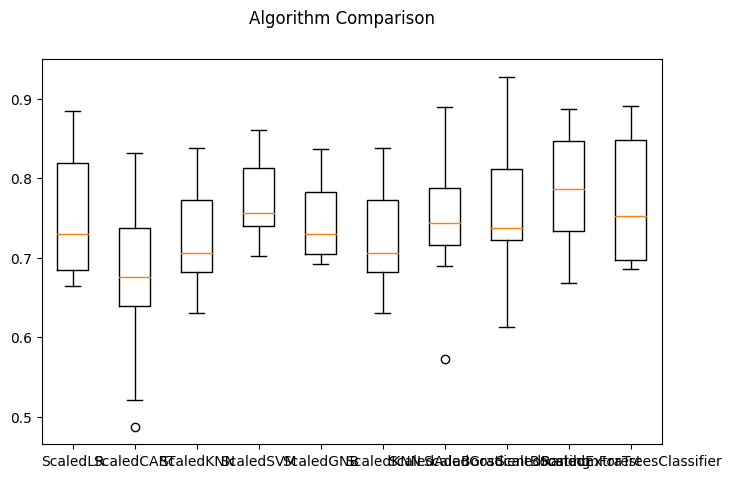

In [2584]:
# boxplot algorithm comparison
fig = pyplot.figure(figsize=(8,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [2588]:
# boxplot algorithm comparison
results_df = pd.DataFrame(results)
results_df = results_df.T
results_df.columns = names

In [2586]:
results_df.mean()

ScaledLR                      0.752654
ScaledCART                    0.670180
ScaledKNN                     0.720344
ScaledSVM                     0.769907
ScaledGNB                     0.745481
ScaledKNN                     0.720344
ScaledAdaBoost                0.749909
ScaledGradientBoosting        0.759684
ScaledRandomForest            0.789817
ScaledExtraTreesClassifier    0.771148
dtype: float64

In [2589]:
# Bar plot of results_df using ggplot
from lets_plot.bistro.corr import *
from lets_plot import *
LetsPlot.setup_html()
X = results_df.columns
Y = results_df.mean()
results_df = pd.DataFrame({'X': X, 'Y': Y})
results_df['Y'] = results_df['Y'].round(2)

p = ggplot(results_df, aes(x='X', y='Y')) + geom_bar(stat='identity', color = 'white', fill = 'black') + coord_flip() + labs(x='', y='')
p + scale_fill_viridis(option='twilight')
p + ggtitle(" ")  + xlab("Model") + ylab("AUROC Score") + theme_classic() + flavor_high_contrast_dark()


# p = ggplot(results_df, aes(x='X', fill='Y')) + geom_bar(position='dodge')
# p + ggtitle(" ")  + xlab("Credit_History") + ylab("Probability") + theme_classic() + flavor_high_contrast_dark()

In [2422]:
# Evaluate and Standardize the dataset

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledGNB', Pipeline([('Scaler', StandardScaler()),('GNB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledAdaBoost', Pipeline([('Scaler', StandardScaler()),('AdaBoost', AdaBoostClassifier())])))
pipelines.append(('ScaledGradientBoosting', Pipeline([('Scaler', StandardScaler()),('GradientBoosting', GradientBoostingClassifier())])))
pipelines.append(('ScaledRandomForest', Pipeline([('Scaler', StandardScaler()),('RandomForest', RandomForestClassifier())])))
pipelines.append(('ScaledExtraTreesClassifier', Pipeline([('Scaler', StandardScaler()),('ExtraTreesClassifier', ExtraTreesClassifier())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
        scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.752654 (0.079632)
ScaledCART: 0.670180 (0.100064)
ScaledKNN: 0.720344 (0.063516)
ScaledSVM: 0.769907 (0.052862)
ScaledGNB: 0.745481 (0.046967)
ScaledKNN: 0.720344 (0.063516)
ScaledAdaBoost: 0.749909 (0.085131)
ScaledGradientBoosting: 0.759684 (0.097830)
ScaledRandomForest: 0.789817 (0.070918)
ScaledExtraTreesClassifier: 0.771148 (0.075198)


In [2529]:
XXX 

NameError: name 'XXX' is not defined

**XGBoost**
---

In [2527]:
df = pd.read_csv("/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Deployment/data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2530]:
def impute_missing(X):
    X['Gender'] = X['Gender'].fillna('Male')
    X['Married'] = X['Married'].fillna('Yes')
    X['Dependents'] = X['Dependents'].fillna(0)
    X['Self_Employed'] = X['Self_Employed'].fillna('No')
    X['LoanAmount'] = X['LoanAmount'].fillna(X['LoanAmount'].mean())
    X['Loan_Amount_Term'] = X['Loan_Amount_Term'].fillna(X['Loan_Amount_Term'].mean())
    X['Credit_History'] = X['Credit_History'].fillna(1)
    return X

In [2531]:
# define pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2532]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier())
])

# define parameters
parameters = {
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [2, 3, 4],
    'clf__min_child_weight': [1, 2, 3],
    'clf__gamma': [0.5, 0.6, 0.7],
    'clf__subsample': [0.5, 0.6, 0.7],
    'clf__colsample_bytree': [0.5, 0.6, 0.7],
    'clf__objective': ['binary:logistic'],
    'clf__n_jobs': [-1]
}

# define grid search

grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# print best score and params
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.get_params())

# predict on test data
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
0.7707607471225983
{'clf__colsample_bytree': 0.6, 'clf__gamma': 0.5, 'clf__learning_rate': 0.01, 'clf__max_depth': 4, 'clf__min_child_weight': 1, 'clf__n_estimators': 100, 'clf__n_jobs': -1, 'clf__objective': 'binary:logistic', 'clf__subsample': 0.5}
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.6, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.5, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None,

In [2528]:
# import xgboost
import xgboost

In [2424]:
# logistic regression with XGBoost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.7752808988764045


In [2425]:
# tune xgb classifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
model = XGBClassifier()
n_estimators = [30, 40, 50, 100, 150, 200, 250, 300, 350, 400]
max_depth = [1, 2, 3, 4, 5, 6, 8, 10, 20, 30]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid_search = GridSearchCV(model, param_grid, scoring=scoring, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
best_params = grid_result.best_params_

Best: 0.777621 using {'max_depth': 1, 'n_estimators': 50}


In [2432]:
X_test.head()

,Married,Loan_Amount_Term,Credit_History,Loan_to_income_ratio,LoanAmount_log,TotalIncome,loan_to_income_total_ratio
275,1,360.0,1.0,0.041818,4.744932,8.432071,13.638405
313,1,84.0,1.0,0.025061,4.969813,8.656259,16.635361
500,-1,480.0,1.0,0.175194,4.727388,8.372861,13.495985
221,1,360.0,1.0,0.028935,4.753590,8.652772,13.406108
40,-1,360.0,1.0,0.022222,4.382027,8.188689,9.769573


In [2426]:
# xgb classifier with best parameters
model = XGBClassifier(n_estimators = 50, max_depth = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8539325842696629
[[20  9]
 [ 4 56]]


/Users/patrick/opt/anaconda3/envs/Python_3_9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


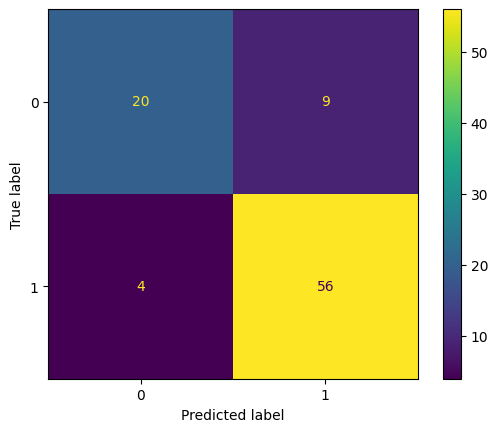

In [2533]:
# plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()


In [ ]:
# plot confusion matrix using lets-plot



In [2429]:
# import joblib
import joblib
import pickle

In [2430]:
# save model 
filename = '/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Deployment/Models/xgb_model.sav'
joblib.dump(model, filename)


['/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Deployment/Models/xgb_model.sav']

In [2431]:
filename = '/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Deployment/Models/xgb_model.pkl'
pickle.dump(model, open(filename, 'wb'))

**Random Forest**
---

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [ ]:
Gender 0
Married 0
Dependents 0
Education 0
Self_Employed 0
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 0
Loan_Amount_Term 0
Credit_History 0
Property_Area 0
Loan_Status 0
Loan_to_income_ratio 0
Loan_to_income_ratio_bin 22
LoanAmount_log 0
Loan_Amount_Term_log 0
TotalIncome 0
loan_to_income_total_ratio 0

In [2441]:
df = pd.read_csv("/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Deployment/data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2442]:
# PROCESSING FUNCTIONS FOR PIPELINE
def process_data(df):
 
    # fill loan amount with mean value using np where function
    try:
        df['LoanAmount'] = np.where(df['LoanAmount'].isnull(), df['LoanAmount'].mean(), df['LoanAmount'])
    # df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
    except:
       df['LoanAmount'] = 0
       
    try:
        df['Loan_to_income_ratio'] = df['LoanAmount'] / (df['ApplicantIncome'])
    except:
        df['Loan_to_income_ratio'] = 0
    # avoid self-checking indexing error (self.columns.get_loc(key)
    if'ApplicantIncome' not in df.columns:
        try:
            df['ApplicantIncome'] = 0
            df['Loan_to_income_total_ratio'] = 0
        except:
            pass

    df['LoanAmmount_log'] = np.log(df['LoanAmount'])

    df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'])

    try:
        df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    except:
        df['TotalIncome'] = df['ApplicantIncome']

    df['Credit_History'].fillna(1, inplace=True)

    df.drop(['Gender', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Property_Area'], axis=1, inplace=True)

In [2435]:
process_data(df)
df.head()

,Loan_ID,Married,Loan_Amount_Term,Credit_History,Loan_Status,Loan_to_income_ratio,LoanAmmount_log,Loan_Amount_Term_log,TotalIncome
0,LP001002,No,360.0,1.0,Y,0.025032,4.986426,5.886104,5849.0
1,LP001003,Yes,360.0,1.0,N,0.027929,4.852030,5.886104,6091.0
2,LP001005,Yes,360.0,1.0,Y,0.022000,4.189655,5.886104,3000.0
3,LP001006,Yes,360.0,1.0,Y,0.046458,4.787492,5.886104,4941.0
4,LP001008,No,360.0,1.0,Y,0.023500,4.948760,5.886104,6000.0


In [2443]:
def transform_categorical(df):
    df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
    df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
    df['Credit_History'] = df['Credit_History'].map({1.: 1, 0.: 0})
    return df

In [2437]:
transform_categorical(df)

,Loan_ID,Married,Loan_Amount_Term,Credit_History,Loan_Status,Loan_to_income_ratio,LoanAmmount_log,Loan_Amount_Term_log,TotalIncome
0,LP001002,0.0,360.0,1,1,0.025032,4.986426,5.886104,5849.0
1,LP001003,1.0,360.0,1,0,0.027929,4.852030,5.886104,6091.0
2,LP001005,1.0,360.0,1,1,0.022000,4.189655,5.886104,3000.0
3,LP001006,1.0,360.0,1,1,0.046458,4.787492,5.886104,4941.0
4,LP001008,0.0,360.0,1,1,0.023500,4.948760,5.886104,6000.0
...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,360.0,1,1,0.024483,4.262680,5.886104,2900.0
610,LP002979,1.0,180.0,1,1,0.009742,3.688879,5.192957,4106.0
611,LP002983,1.0,360.0,1,1,0.031343,5.533389,5.886104,8312.0
612,LP002984,1.0,360.0,1,1,0.024660,5.231109,5.886104,7583.0


In [2438]:
def train_test_split(df):
# select features and target variable using loc
    X = df.drop(['Loan_Status'], axis=1)
    y = df['Loan_Status']
    X = X.replace(0, -1)
    

In [2439]:
train_test_split(df)

In [ ]:
X

,Married,Loan_Amount_Term,Credit_History,Loan_to_income_ratio,LoanAmount_log,TotalIncome,loan_to_income_total_ratio
0,-1,360.0,1.0,-1.000000,4.986426,8.674026,16.879378
1,1,360.0,1.0,0.027929,4.852030,8.714568,14.688050
2,1,360.0,1.0,0.022000,4.189655,8.006368,8.243439
3,1,360.0,1.0,0.046458,4.787492,8.505323,14.108812
4,-1,360.0,1.0,0.023500,4.948760,8.699515,16.207801
...,...,...,...,...,...,...,...
609,-1,360.0,1.0,0.024483,4.262680,7.972466,8.905651
610,1,180.0,1.0,0.009742,3.688879,8.320205,4.807574
611,1,360.0,1.0,0.031343,5.533389,9.025456,28.031826
612,1,360.0,1.0,0.024660,5.231109,8.933664,20.932061


In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

In [ ]:
# create function transformer for processing data
process_data_transformer = FunctionTransformer(process_data)
transform_categorical_transformer = FunctionTransformer(transform_categorical)
train_test_split_transformer = FunctionTransformer(train_test_split)


In [ ]:
# own class that can be inserted to pipeline as any other sklearn object.
class RawFeats:
    def __init__(self, feats):
        self.feats = feats

    def fit(self, X, y=None):
        pass


    def transform(self, X, y=None):
        return X[self.feats]

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

#Married	Loan_Amount_Term	Credit_History	Loan_to_income_ratio	LoanAmount_log	TotalIncome	loan_to_income_total_ratio
feats = ['Married', 'Loan_Amount_Term', 'Credit_History', 'Loan_to_income_ratio', 'loan_to_income_total_ratio', 'LoanAmount_log', 'TotalIncome']
# creating class object with indexes we want to keep.
raw_feats = RawFeats(feats)

In [ ]:
# call class object
raw_feats.transform(X)

,Married,Loan_Amount_Term,Credit_History,Loan_to_income_ratio,loan_to_income_total_ratio,LoanAmount_log,TotalIncome
0,0,360.0,1.0,0.000000,16.879378,4.986426,8.674026
1,1,360.0,1.0,0.027929,14.688050,4.852030,8.714568
2,1,360.0,1.0,0.022000,8.243439,4.189655,8.006368
3,1,360.0,1.0,0.046458,14.108812,4.787492,8.505323
4,0,360.0,1.0,0.023500,16.207801,4.948760,8.699515
...,...,...,...,...,...,...,...
609,0,360.0,1.0,0.024483,8.905651,4.262680,7.972466
610,1,180.0,1.0,0.009742,4.807574,3.688879,8.320205
611,1,360.0,1.0,0.031343,28.031826,5.533389,9.025456
612,1,360.0,1.0,0.024660,20.932061,5.231109,8.933664


In [ ]:
transform_pipeline = Pipeline([
    ('process_data', process_data_transformer),
    ('transform_categorical', transform_categorical_transformer)])

# fit the pipeline to the training data
transform_pipeline.fit(df)

split_pipeline = Pipeline([
    ('train_test_split', train_test_split_transformer)])

# fit the pipeline to the training data
split_pipeline.fit(X, y)

# create pipeline for raw features

Raw_Features = Pipeline(raw_feats.transform(X))

# create pipeline for XGBoost

xgb_pipeline = Pipeline([
    ('raw_feats', Raw_Features),
    ('xgb', XGBClassifier())
])

# combine pipelines
combined_pipeline = FeatureUnion([
    ('transform_pipeline', transform_pipeline),
    ('split_pipeline', split_pipeline),
    ('xgb_pipeline', xgb_pipeline)
])

# fit pipeline
combined_pipeline.fit(X, y)

/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_6627/3027933548.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LoanAmount'] = 0
/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_6627/3027933548.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_to_income_ratio'] = 0
/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_6627/3027933548.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

KeyError: "['CoapplicantIncome'] not found in axis"

In [2487]:
json_data = {#'Loan_ID': 'LP001015',
'Gender': 'Male',
 'Married': 'No',
 'Dependents': 0,
 'Education': 'Graduate',
 'Self_Employed': 'No',
    'ApplicantIncome': 5720,
    'CoapplicantIncome': 0.0,
    'LoanAmount': 110.0,
    'Loan_Amount_Term': 360.0,
    'Credit_History': 1.0,
    'Property_Area': 'Urban'}

In [ ]:
Married	Loan_Amount_Term	Credit_History	Loan_to_income_ratio	LoanAmount_log	TotalIncome	loan_to_income_total_ratio

In [2488]:
# PROCESSING FUNCTIONS FOR PIPELINE
def process_data(df):
 
    # fill loan amount with mean value using np where function
    try:
        df['LoanAmount'] = np.where(df['LoanAmount'].isnull(), df['LoanAmount'].mean(), df['LoanAmount'])
    # df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
    except:
       df['LoanAmount'] = 0
       
    try:
        df['Loan_to_income_ratio'] = df['LoanAmount'] / (df['ApplicantIncome'])
    except:
        df['Loan_to_income_ratio'] = 0
    # avoid self-checking indexing error (self.columns.get_loc(key)
    if'ApplicantIncome' not in df.columns:
        try:
            df['ApplicantIncome'] = 0
            df['Loan_to_income_total_ratio'] = 0
        except:
            pass

    df['LoanAmmount_log'] = np.log(df['LoanAmount'])

    # df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'])

    try:
        df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    except:
        df['TotalIncome'] = df['ApplicantIncome']

    df['Credit_History'].fillna(1, inplace=True)

    df['loan_to_income_total_ratio'] = df['LoanAmount'] / (df['TotalIncome'])

    df.drop(['Gender', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Property_Area'], axis=1, inplace=True)

In [ ]:
def transform_categorical(df):
    df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
    df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
    df['Credit_History'] = df['Credit_History'].map({1.: 1, 0.: 0})
    return df

In [2489]:

def transform_json(json_data):
    df = pd.DataFrame(json_data, index=[0])
    return df
    
    df['Loan_Status'] = 0
    process_data(df)
    transform_categorical(df)
    X = df.drop('Loan_Status', axis=1)
    X['LoanAmount_log'] = np.log(X['LoanAmount']) 
    X['TotalIncome'] = X['ApplicantIncome'] + X['CoapplicantIncome']
    # drop Loan_Amount_Term_log
    X.drop(['Loan_Amount_Term_log'], axis=1, inplace=True)

    def transform_X(X):
        X['loan_to_income_total_ratio'] = X['LoanAmount'] / (X['ApplicantIncome'] + X['CoapplicantIncome'])
        return X


In [2490]:
X1 = transform_data(json_data)

In [ ]:
['Married', 'Loan_Amount_Term', 'Credit_History', 'Loan_to_income_ratio', 'LoanAmount_log', 'TotalIncome', 'loan_to_income_total_ratio']\
     ['Married', 'Loan_Amount_Term', 'Credit_History', 'Loan_to_income_ratio', 'LoanAmmount_log', 'TotalIncome', 'loan_to_income_total_ratio']

In [2491]:
X1.head()

,Married,Loan_Amount_Term,Credit_History,Loan_to_income_ratio,LoanAmmount_log,TotalIncome,loan_to_income_total_ratio
0,0,360.0,1,0.019231,4.70048,5720.0,0.019231


In [ ]:
transform_data(json_data)

,Married,Loan_Amount_Term,Credit_History,Load_ID,Loan_to_income_ratio,Loan_to_income_total_ratio,LoanAmmount_log,Loan_Amount_Term_log,TotalIncome
0,0,360.0,1,0,0.019231,0.009615,4.70048,5.886104,5720.0


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [ ]:
# import flask
from flask import Flask, jsonify, request
# import Resource, Api and reqparser
from flask_restful import Resource, Api, reqparse
import pandas as pd
import numpy
import pickle

# Create a new flask app instance
app = Flask(__name__)
# Create the API object
api = Api(app)

create a class that inherits from the Resource class

class 

filename = '/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Deployment/Models/xgb_model.pkl'
model = pickle.load(open(filename, 'rb'))

# Create a class for your endpoint and inherit from Resource
class Scoring(Resource):
    def post(self):
        json_data = request.get_json()
        df = pd.DataFrame(json_data.values(), index=json_data.keys()).transpose()
        # getting predictions from our model.
        # it is much simpler because we used pipelines during development
        res = model.predict_proba(df)
        # we cannot send numpt array as a result
        return res.tolist() 

# assign endpoint
api.add_resource(Scoring, '/scoring')

#The last thing to do is to create an application run when the file api.py is run directly

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=888)


In [ ]:
#Create a function that will take one row of data and predict the probability of being granted a loan.
def predict_loan(row):
    